In [76]:
import pickle
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
#load the data
tsla = pickle.load(open("data_h.pickle","rb"))
print(tsla.head(15))
print("\n Dataframe size = ",tsla.shape)
print("\n first index = ",tsla.index[0], "; last index = ", tsla.index[-1], "; second index = ",tsla.index[1])
tsla = tsla.drop(['High','Low','Close','Volume','Dividends','Stock Splits'],axis=1) #just gonna look at Open prices for now

                 Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2019-02-11  62.349998  63.700001  62.135998  63.167999  3140581          0   
2019-02-11  63.153004  63.338001  62.640003  62.902000   876534          0   
2019-02-11  62.935997  63.296001  62.730000  63.250000   801005          0   
2019-02-11  63.230000  63.412640  62.937798  62.956001   563722          0   
2019-02-11  62.996002  63.035999  62.690002  62.840981   513318          0   
2019-02-11  62.826836  62.890003  62.568001  62.796001   453119          0   
2019-02-11  62.770000  62.840004  62.459881  62.570000   642172          0   
2019-02-12  63.230000  63.599998  62.765636  62.964001  1590371          0   
2019-02-12  62.967999  63.430798  62.967999  63.340004   769540          0   
2019-02-12  63.323997  63.355999  62.828003  62.938000   627404          0   
2019-02-12  62.944317  62.984001  61.924000  62.289940  1011159 

In [69]:
def add_hour(x):
    x = x.to_pydatetime() + dt.timedelta(hours=1)
    return pd.Timestamp(x)

In [73]:
#The date indexes need fixing: intra-day observations all have the same index (date). Need to add times to them
#16h-22h UTC ~= 10h-16h LT I'll just use that
tsla = tsla.reset_index()

while tsla.duplicated(subset='Date').any() == True:
    #print(tsla.head())
    tsla_duplicated = tsla.duplicated(subset='Date')
    #print(tsla_duplicated.head())
    tsla.loc[tsla_duplicated,'Date'] = tsla[tsla_duplicated]['Date'].apply(add_hour)
    
for i in range(10):
    tsla.loc[:,'Date'] = tsla[:]['Date'].apply(add_hour)
    
tsla.set_index('Date',inplace=True)
    
print(tsla.head(10))

                          Open
Date                          
2019-02-11 10:00:00  62.349998
2019-02-11 11:00:00  63.153004
2019-02-11 12:00:00  62.935997
2019-02-11 13:00:00  63.230000
2019-02-11 14:00:00  62.996002
2019-02-11 15:00:00  62.826836
2019-02-11 16:00:00  62.770000
2019-02-12 10:00:00  63.230000
2019-02-12 11:00:00  62.967999
2019-02-12 12:00:00  63.323997


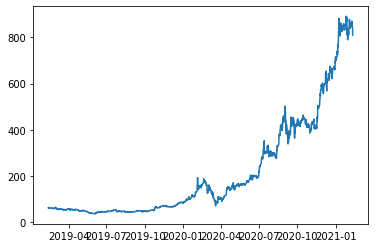

In [77]:
plt.plot(tsla)

In [ ]:
#Code for fixing datetime index in other notebooks or code
def add_hour(x):
    x = x.to_pydatetime() + dt.timedelta(hours=1)
    return pd.Timestamp(x)

tsla = tsla.reset_index()
while tsla.duplicated(subset='Date').any() == True:
    tsla_duplicated = tsla.duplicated(subset='Date')
    tsla.loc[tsla_duplicated,'Date'] = tsla[tsla_duplicated]['Date'].apply(add_hour)   
for i in range(10):
    tsla.loc[:,'Date'] = tsla[:]['Date'].apply(add_hour)    
tsla.set_index('Date',inplace=True)